In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
ATP_color = '#332288'
dATP_color = '#44AA99'

In [329]:
#ATP_cluster_df = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_ATP/combined.cnumvtime.dat',
                            #delim_whitespace = True)
#ATP_cluster_df

In [15]:
skip_inds = []
results_list = []
for i in range(12):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c{}/output_rates.txt'.format(i))
    if len(a)==0:
        print(i)
        skip_inds.append(i)
    else: 
        results_list.append(a)
        
        
ATP_cluster_df.C1.value_counts()
keep_inds = []
keep_counts = []
for i in range(12):
    if i not in skip_inds:
        print(i,ATP_cluster_df.C1.value_counts()[i])
        keep_inds.append(i)
        keep_counts.append(ATP_cluster_df.C1.value_counts()[i])
        
keep_weights = np.array(keep_counts)/sum(keep_counts)

/tmp/ipykernel_25627/2635124244.py:4: UserWarning: loadtxt: Empty input file: "/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c0/output_rates.txt"
  a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c{}/output_rates.txt'.format(i))
/tmp/ipykernel_25627/2635124244.py:4: UserWarning: loadtxt: Empty input file: "/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c3/output_rates.txt"
  a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c{}/output_rates.txt'.format(i))
/tmp/ipykernel_25627/2635124244.py:4: UserWarning: loadtxt: Empty input file: "/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c4/output_rates.txt"
  a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP/results_i/dATP_I_c{}/output_rates.txt'.format(i))


0
3
4
1 5496
2 5446
5 1362
6 1140
7 1107
8 1042
9 909
10 824
11 467


[ 14.1055  14.2794  14.4557 ... 262.898  263.278  264.532 ]
[ 14.889   14.9954  15.0049 ... 259.351  259.588  260.107 ]
[ 15.1428  15.3439  15.3547 ... 286.415  286.697  286.884 ]
[ 15.1482  15.2133  15.3225 ... 259.556  259.836  259.963 ]
[ 14.4373  15.4253  15.5706 ... 258.658  259.198  259.769 ]
[ 15.0971  15.2114  15.2722 ... 257.801  258.04   258.959 ]
[ 14.6317  14.8871  15.1863 ... 263.477  265.007  265.927 ]
[ 15.1025  15.2061  15.6582 ... 261.346  262.706  262.732 ]


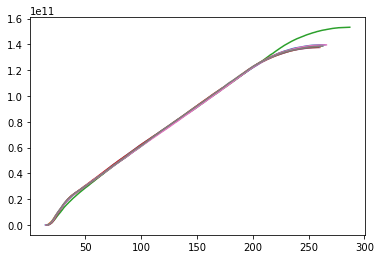

In [16]:

for i in range(8):
    plt.plot(np.array(results_list)[i][:,0], np.array(results_list)[i][:,2])
    print(np.array(results_list)[i][:,0])
    

In [5]:
def calc_wa(input_array, input_weights):

    x_min = 0 # max(input_array[:,0,0])
    x_max = 150
    n = 1000
    x = np.linspace(x_min, x_max, n)
    wa = np.zeros(len(x))
    for i in range(input_array.shape[0]):
        wa = wa + np.interp(x, np.concatenate(([0],input_array[i,:,0])), np.concatenate(([0],input_array[i,:,2])))*input_weights[i]
    return x, wa

#x, wa = calc_wa(np.array(results_list), keep_weights)

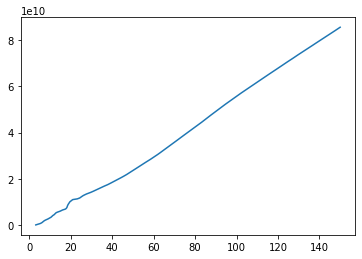

In [256]:
plt.plot(x,wa)

In [257]:
save_name = input('Enter a filename (without extension) to save: ')

Enter a filename (without extension) to save: ATP_site_I


In [258]:
np.savetxt(save_name+'.csv', np.array((x,wa)).T)
print('Saved as {}'.format(save_name+'.csv'))

Saved as ATP_site_I.csv


In [259]:
ATP_final = np.loadtxt('ATP_site_I.csv')
dATP_final = np.loadtxt('dATP_site_I.csv')

/tmp/ipykernel_681352/2367550664.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure1 = plt.subplots(figsize = (8,4))


Text(0, 0.5, 'Ca$^{2+}$ binding rate (1/(Ms))')

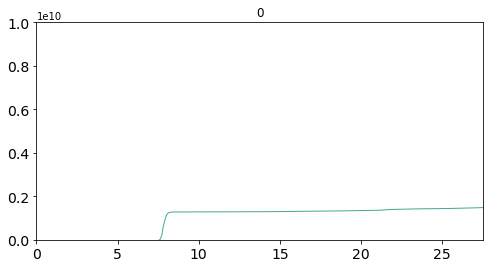

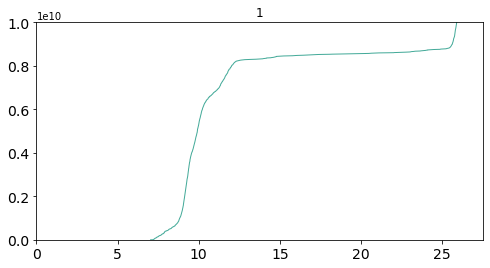

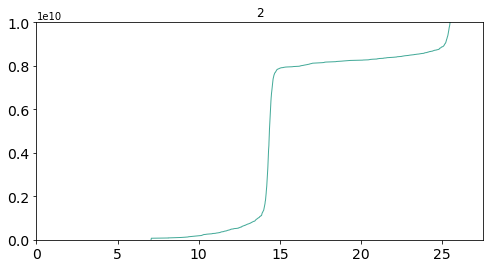

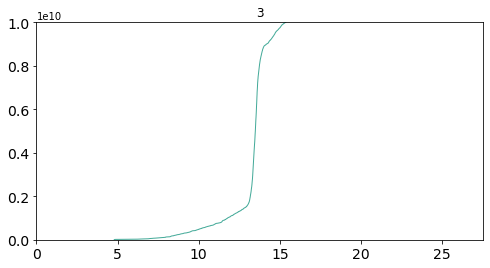

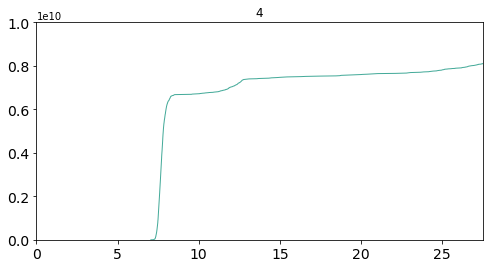

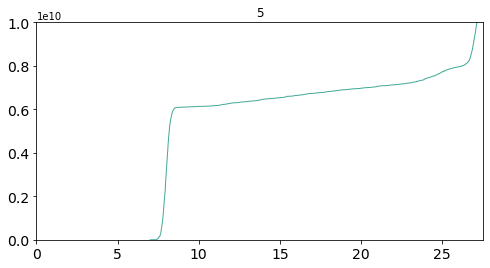

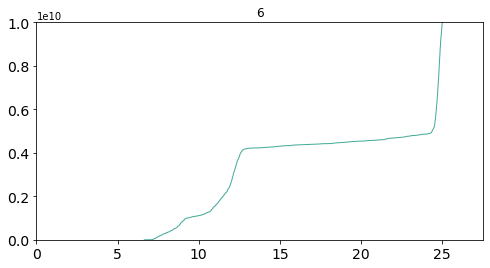

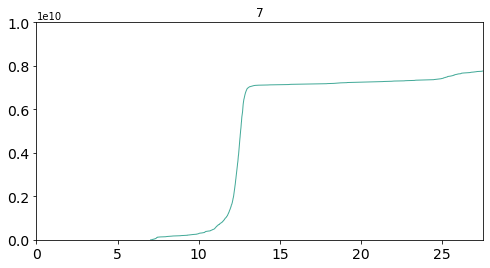

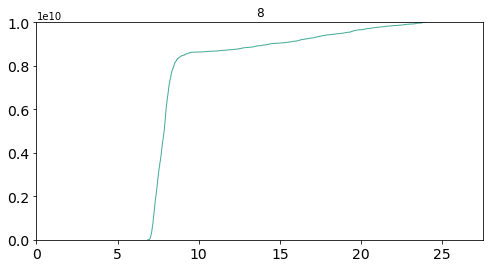

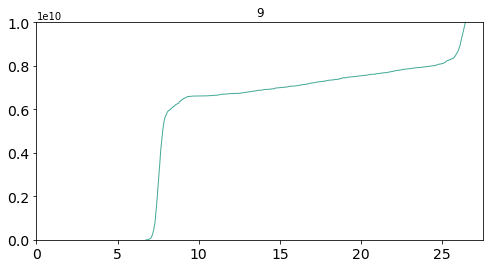

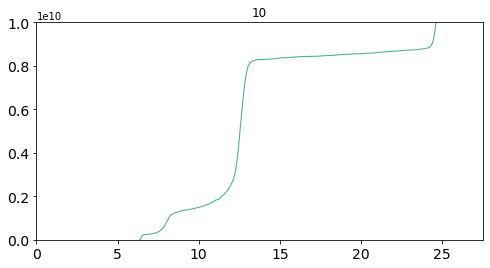

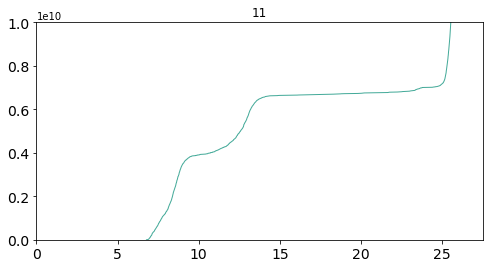

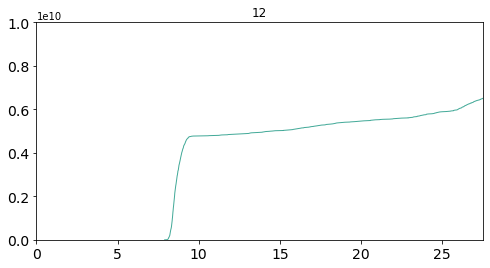

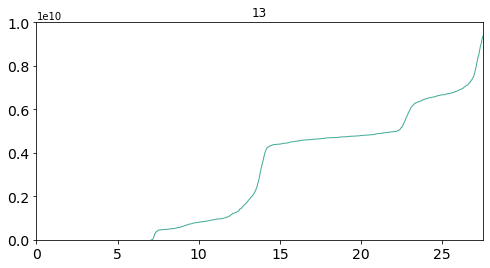

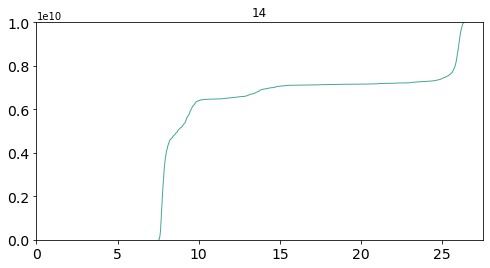

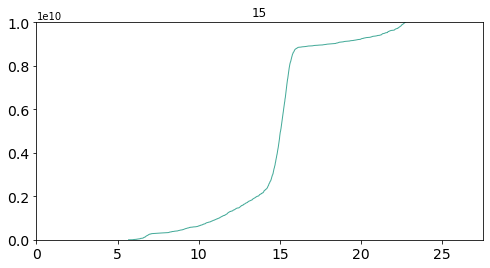

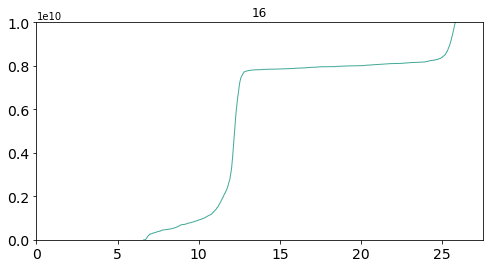

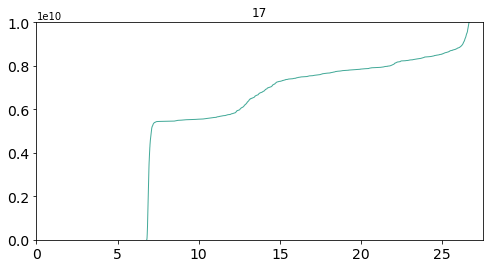

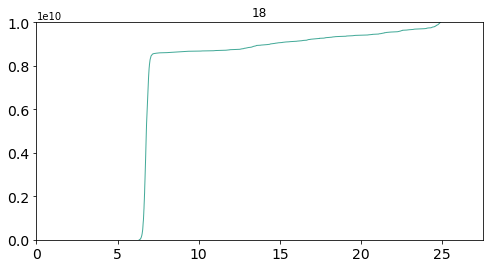

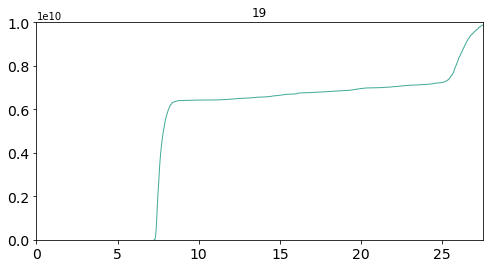

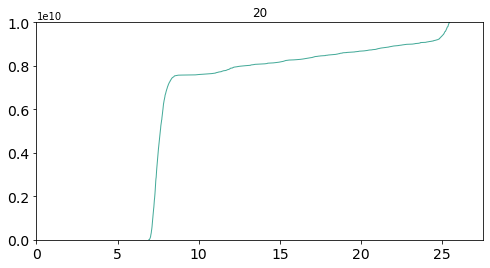

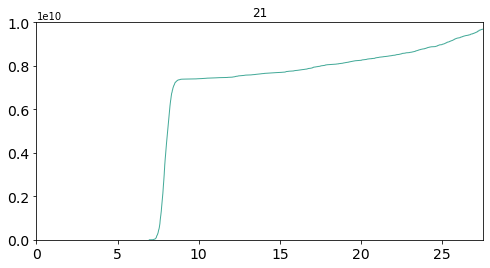

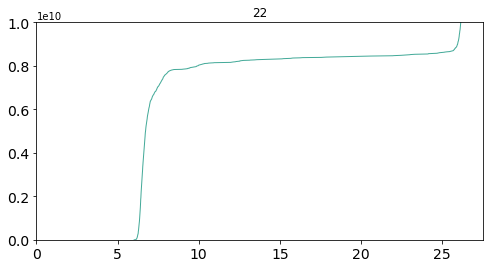

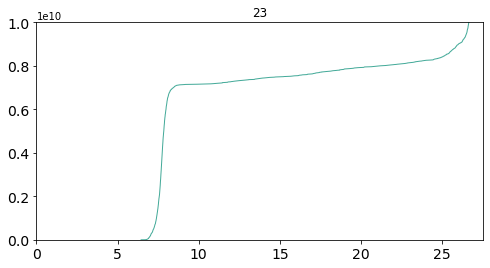

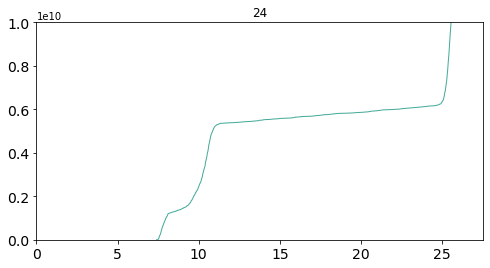

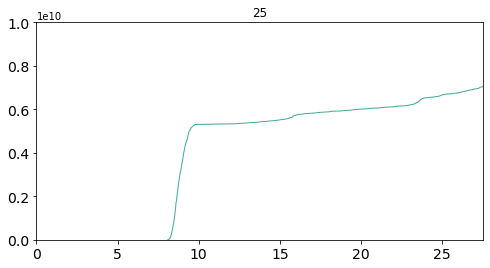

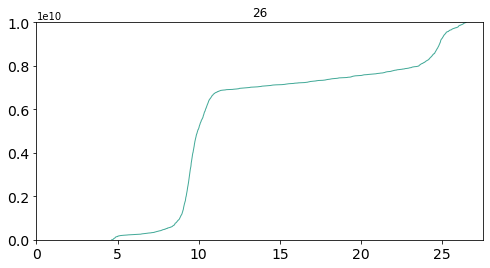

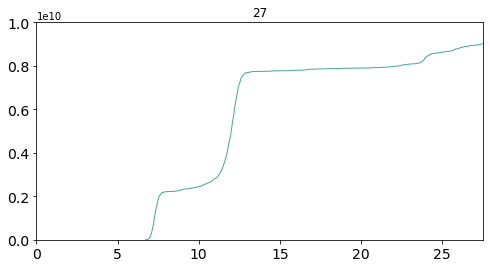

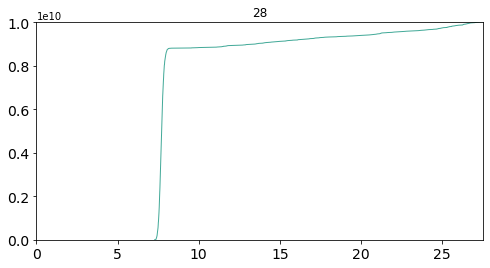

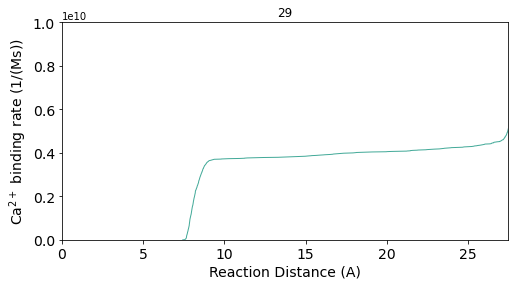

In [332]:

for i in range(30):
    figure1 = plt.subplots(figsize = (8,4))
    plt.title(i)
    plt.plot(results_list[i][:,0], results_list[i][:,1], color = dATP_color, linewidth = 1)
#plt.plot(dATP_final[:,0], dATP_final[:,1], color = dATP_color, linewidth = 3, label = 'dATP')
    plt.xlim(0,27.5)
    plt.ylim(0,10e9)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
ax = plt.gca()

plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('Ca$^{2+}$ binding rate (1/(Ms))', fontsize = 14)

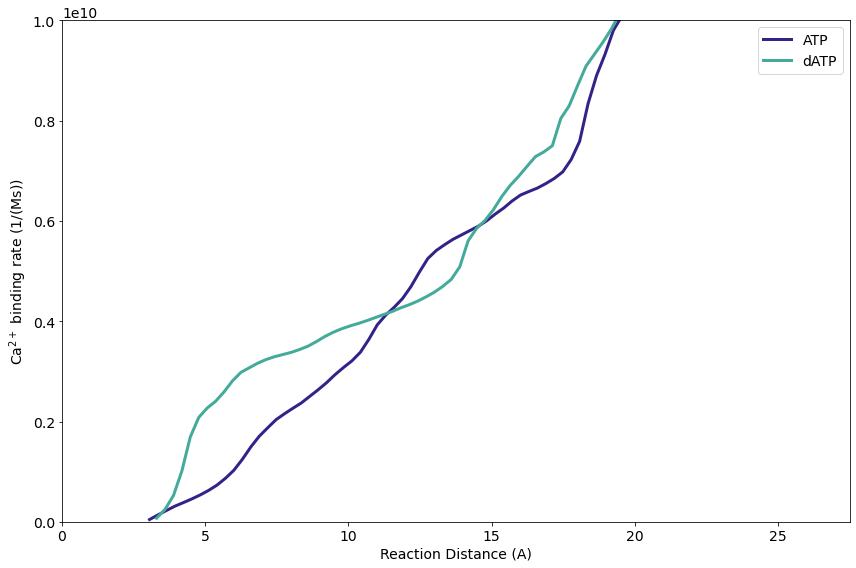

In [309]:
figure1 = plt.figure(figsize = (12,8))

plt.plot(ATP_final[:,0], ATP_final[:,1], color = ATP_color, linewidth = 3, label = 'ATP')
plt.plot(dATP_final[:,0], dATP_final[:,1], color = dATP_color, linewidth = 3, label = 'dATP')
plt.xlim(0,27.5)
plt.ylim(0,10e9)
plt.yticks(fontsize=14)
plt.legend(fontsize = 14)
plt.xticks(fontsize=14)
ax = plt.gca()

ax.yaxis.get_offset_text().set_fontsize(14)
plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('Ca$^{2+}$ binding rate (1/(Ms))', fontsize = 14)
plt.tight_layout()

#plt.savefig('Ca_site_i.svg')

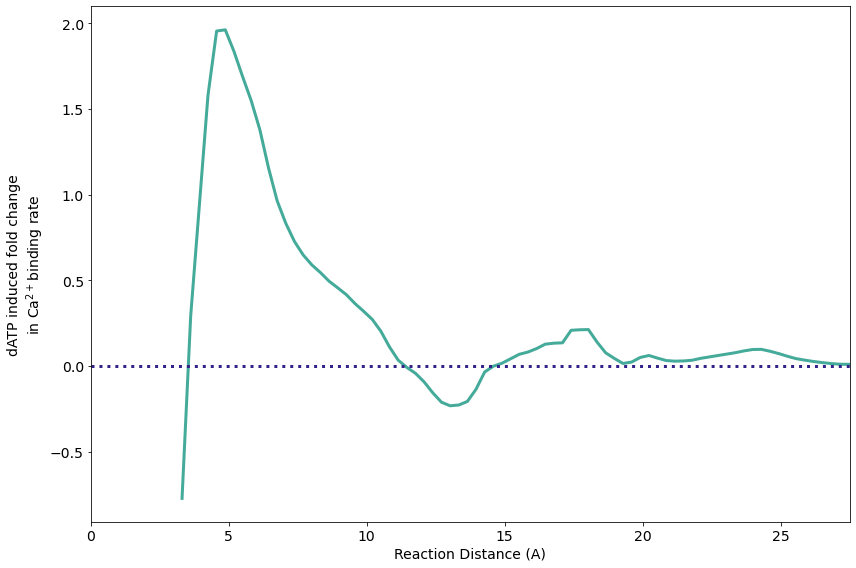

In [302]:
figure1 = plt.figure(figsize = (12,8))

start_interp = min(dATP_final[:,0])
x  = np.linspace(start_interp, 50, 150)
plt.plot(x, 
         np.log2(np.interp(x, dATP_final[:,0], dATP_final[:,1])/np.interp(x, ATP_final[:,0], ATP_final[:,1])),
        color = dATP_color, linewidth = 3)
lim = plt.xlim()
plt.plot((0,60),(0,0),':', color = ATP_color, linewidth = 3)

plt.xlim(0,27.5)

plt.yticks(fontsize=14)

plt.xticks(fontsize=14)

plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('dATP induced fold change\nin Ca$^{2+}$binding rate', fontsize = 14)
plt.tight_layout()
#plt.savefig('Change_Ca_site_i.svg')

### New Cluster Analysis with Desolvation of 0.025

In [7]:
ATP_cluster_df = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_ATP/30_cnumvtime.dat',
                            delim_whitespace = True)

In [8]:
skip_inds = []
results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_ATP_site_I/directory_{}/output_rates.txt'.format(i))
    if len(a)==0:
        print(i)
        skip_inds.append(i)
    else: 
        results_list.append(a)
        
        
ATP_cluster_df.C1.value_counts()
keep_inds = []
keep_counts = []
for i in range(30):
    if i not in skip_inds:
        print(i,ATP_cluster_df.C1.value_counts()[i])
        keep_inds.append(i)
        keep_counts.append(ATP_cluster_df.C1.value_counts()[i])
        
keep_weights = np.array(keep_counts)/sum(keep_counts)

0 2516
1 2204
2 1844
3 1738
4 1690
5 1680
6 1626
7 1615
8 1454
9 1225
10 1189
11 1162
12 1146
13 1023
14 1000
15 869
16 822
17 818
18 694
19 674
20 518
21 495
22 494
23 493
24 310
25 293
26 201
27 84
28 67
29 56


/tmp/ipykernel_681352/1807131747.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


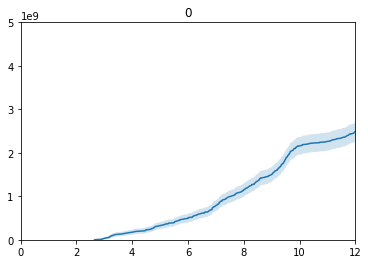

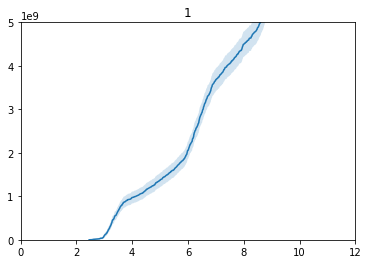

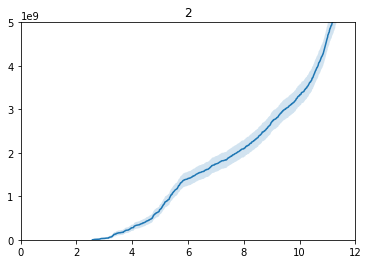

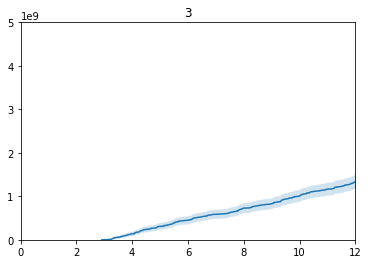

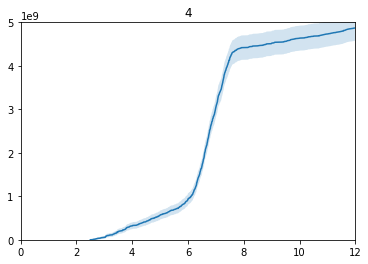

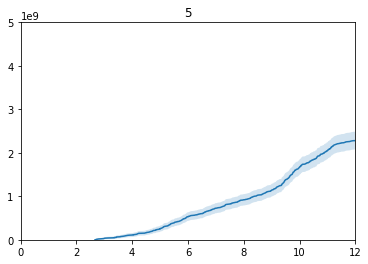

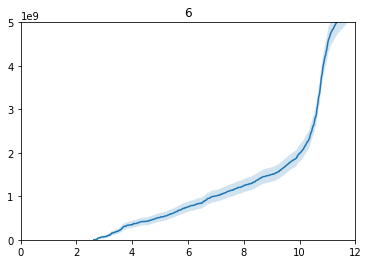

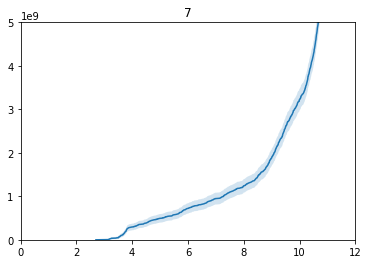

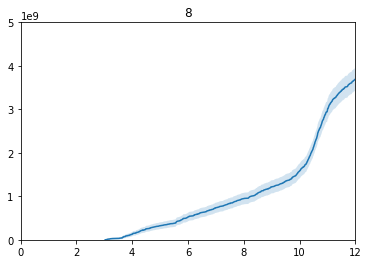

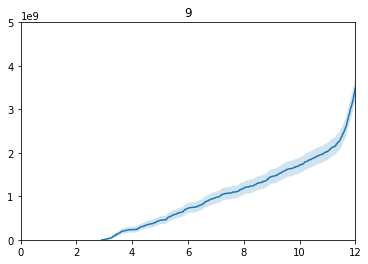

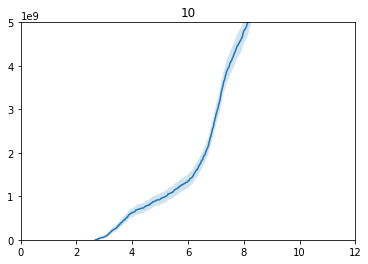

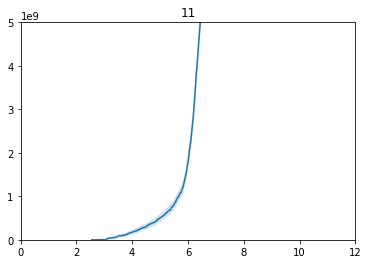

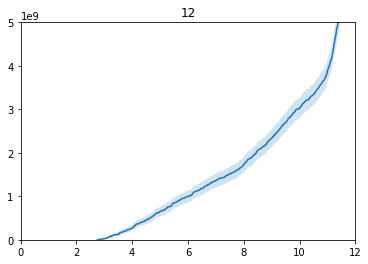

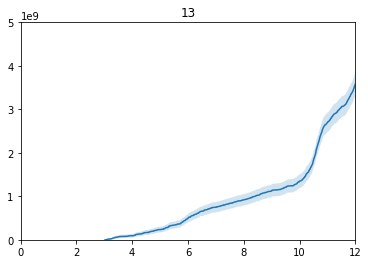

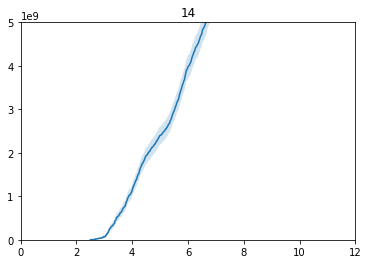

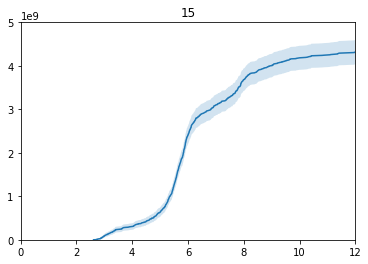

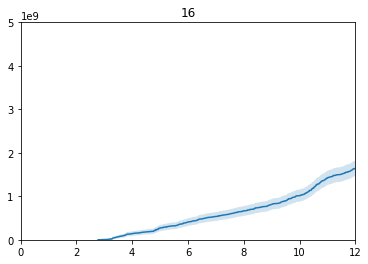

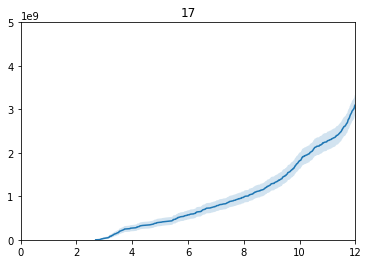

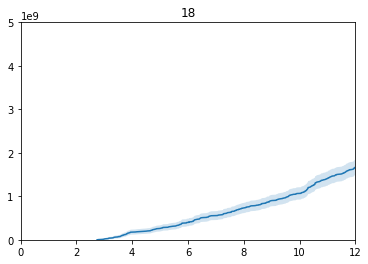

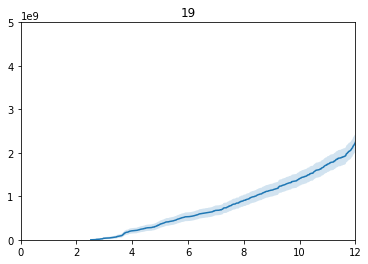

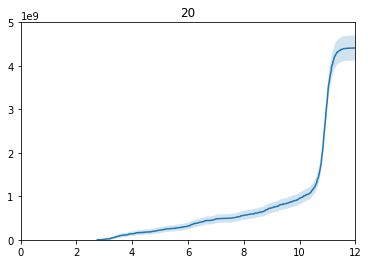

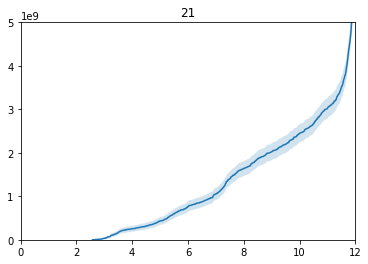

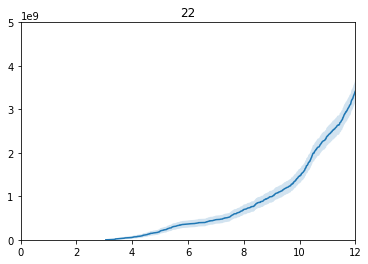

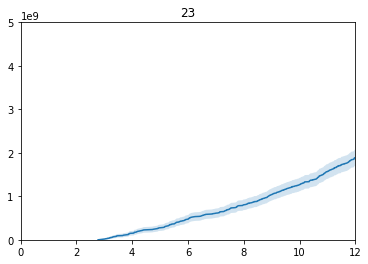

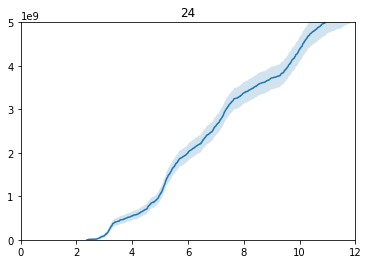

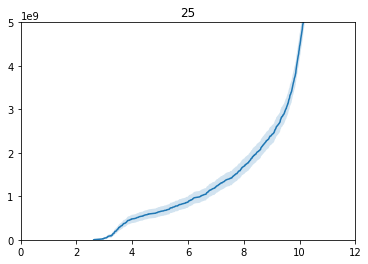

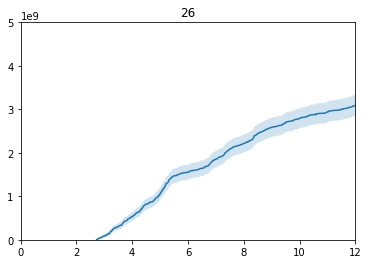

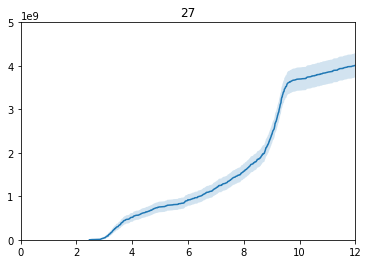

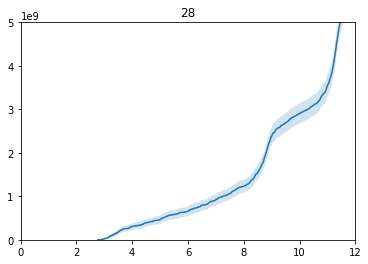

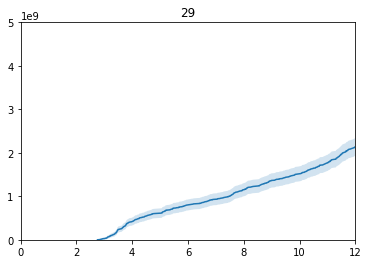

In [14]:
for i in range(30):
    plt.figure()
    plt.title(i)
    plt.plot(results_list[i][:,0], results_list[i][:,2])
    plt.fill_between(results_list[i][:,0], results_list[i][:,1], results_list[i][:,3], alpha = 0.2)
    plt.xlim((0,12))
    plt.ylim((0,0.5e10))

### Loading in dATP


In [246]:
dATP_cluster_df = pd.read_csv('/home/marcus/Documents/SERCA/serca-atp-datp/simulation_structures/stripped_trajectories/human_dATP/30_cnumvtime.dat',
                            delim_whitespace = True)

In [247]:
dATP_cluster_df

,#Frame,C1
0,1,27
1,2,27
2,3,27
3,4,27
4,5,27
...,...,...
29995,29996,23
29996,29997,23
29997,29998,23
29998,29999,23


In [319]:
skip_inds = []
results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP_site_I/directory_{}/output_rates.txt'.format(i))
    if len(a)==0:
        print(i)
        skip_inds.append(i)
    else: 
        results_list.append(a)
        
        
dATP_cluster_df.C1.value_counts()
keep_inds = []
keep_counts = []
for i in range(30):
    if i not in skip_inds:
        print(i,dATP_cluster_df.C1.value_counts()[i])
        keep_inds.append(i)
        keep_counts.append(dATP_cluster_df.C1.value_counts()[i])
        
keep_weights = np.array(keep_counts)/sum(keep_counts)

0 3641
1 3535
2 2709
3 1590
4 1578
5 1560
6 1553
7 1345
8 1239
9 1017
10 998
11 886
12 826
13 816
14 735
15 682
16 574
17 509
18 498
19 423
20 414
21 404
22 371
23 369
24 352
25 332
26 327
27 315
28 229
29 173


In [249]:
x, wa = calc_wa(np.array(results_list), keep_weights)

### Machine Learning Approaches 

In [333]:
def process_for_ICA(results_list):
    n_features = 100
    new_array = np.zeros((30, n_features)) # Xarray-like of shape (n_samples, n_features)
    input_array = np.array(results_list)
    x_min = max(input_array[:,0,0]) 
    x_max = 30
    x_range = np.linspace(x_min, x_max, n_features)
    for i in range(len(results_list)):
        new_array[i,:] = np.interp(x_range, results_list[i][:,0], results_list[i][:,2]) 
        
    return new_array
        
    
    
X = process_for_ICA(results_list)

In [337]:
X.shape

(30, 100)

In [338]:
from sklearn.decomposition import FastICA

In [383]:
from sklearn.decomposition import FastICA, PCA

# Compute ICA
ica = FastICA(n_components=20, whiten="arbitrary-variance", random_state = 11)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
#assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

In [384]:
S_.shape

(30, 20)

In [385]:
A_.shape

(100, 20)

In [387]:
S_.shape

(30, 20)

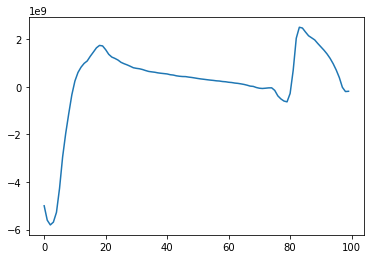

In [386]:
plt.plot(A_[:,0])

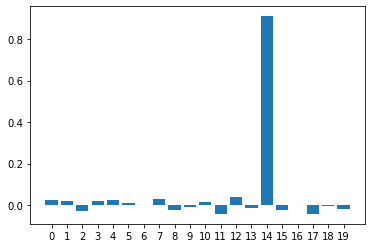

In [377]:
plt.bar(np.arange(20),S_[0,:])
plt.xticks(np.arange(20))
plt.show()

In [126]:
from sklearn import preprocessing
import numpy as np

X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [128]:
from sklearn.decomposition import PCA

In [181]:
pca = PCA(n_components=20).fit(X_scaled)

In [187]:
transformed = pca.transform(X_scaled)

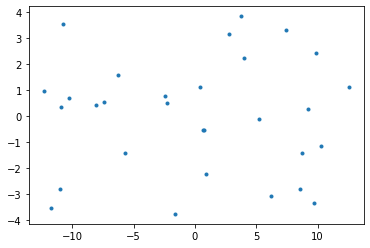

In [188]:
transformed.shape # (Samples , components) 
plt.plot(transformed[:,0], transformed[:,3],'.')

In [200]:
transformed[5]


array([ 7.39811575, -0.51846321,  3.05010571,  3.32725371, -3.04643693,
       -1.97851084, -0.85526632,  0.50399287, -0.29456678, -1.38844659,
        0.64826434,  0.49854642, -0.38280945, -0.31319139, -0.33924028,
       -0.45026205,  0.0444083 , -0.42452275, -0.3230092 , -0.04574348])

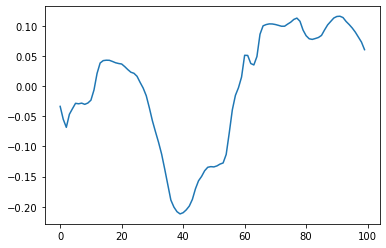

In [189]:
plt.plot(pca.components_[2])

In [192]:
np.cumsum(pca.explained_variance_ratio_)

array([0.60194835, 0.76910881, 0.83585881, 0.88292279, 0.91806483,
       0.94111451, 0.95825115, 0.96798768, 0.97403006, 0.97961179,
       0.98414683, 0.98826238, 0.99081314, 0.99278032, 0.99425896,
       0.99557034, 0.99665521, 0.9974451 , 0.99808557, 0.99852584])

<BarContainer object of 20 artists>

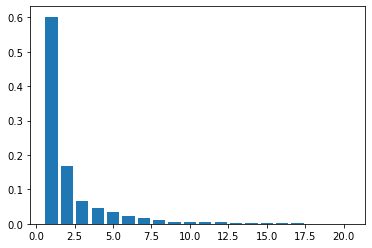

In [190]:
plt.bar(np.arange(1,21), pca.explained_variance_ratio_)

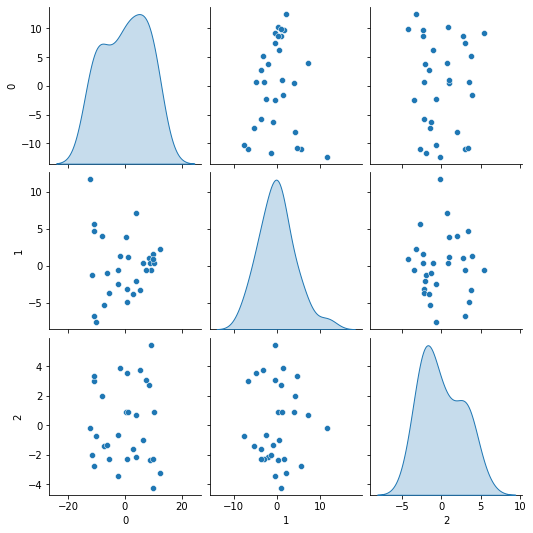

In [191]:
sns.pairplot(pd.DataFrame(transformed[:,0:3]), diag_kind="kde")

In [219]:
test = np.zeros((30,30))

for i in range(30):
    for j in range(30):
        test[i,j] = np.linalg.norm(X_scaled[i,:] - X_scaled[j,:])
        

### Site II Calcium Binding 

#### ATP

In [323]:
skip_inds = []
results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_ATP_site_II/directory_{}/output_rates.txt'.format(i))
    if len(a)==0:
        print(i)
        skip_inds.append(i)
    else: 
        results_list.append(a)
        
        
ATP_cluster_df.C1.value_counts()
keep_inds = []
keep_counts = []
for i in range(30):
    if i not in skip_inds:
        print(i,dATP_cluster_df.C1.value_counts()[i])
        keep_inds.append(i)
        keep_counts.append(dATP_cluster_df.C1.value_counts()[i])
        
keep_weights = np.array(keep_counts)/sum(keep_counts)

0 3641
1 3535
2 2709
3 1590
4 1578
5 1560
6 1553
7 1345
8 1239
9 1017
10 998
11 886
12 826
13 816
14 735
15 682
16 574
17 509
18 498
19 423
20 414
21 404
22 371
23 369
24 352
25 332
26 327
27 315
28 229
29 173


In [280]:
x, wa = calc_wa(np.array(results_list), keep_weights)

In [281]:
save_name = input('Enter a filename (without extension) to save: ')

Enter a filename (without extension) to save: ATP_site_II


In [282]:
np.savetxt(save_name+'.csv', np.array((x,wa)).T)
print('Saved as {}'.format(save_name+'.csv'))

Saved as ATP_site_II.csv


#### dATP

In [325]:
skip_inds = []
results_list = []
for i in range(30):
    a = np.loadtxt('/home/marcus/Documents/SERCA/serca-atp-datp/ca_bd/human_dATP_site_II/directory_{}/output_rates.txt'.format(i))
    if len(a)==0:
        print(i)
        skip_inds.append(i)
    else: 
        results_list.append(a)
        
        
dATP_cluster_df.C1.value_counts()
keep_inds = []
keep_counts = []
for i in range(30):
    if i not in skip_inds:
        print(i,dATP_cluster_df.C1.value_counts()[i])
        keep_inds.append(i)
        keep_counts.append(dATP_cluster_df.C1.value_counts()[i])
        
keep_weights = np.array(keep_counts)/sum(keep_counts)

0 3641
1 3535
2 2709
3 1590
4 1578
5 1560
6 1553
7 1345
8 1239
9 1017
10 998
11 886
12 826
13 816
14 735
15 682
16 574
17 509
18 498
19 423
20 414
21 404
22 371
23 369
24 352
25 332
26 327
27 315
28 229
29 173


In [284]:
x, wa = calc_wa(np.array(results_list), keep_weights)

In [285]:
save_name = input('Enter a filename (without extension) to save: ')

Enter a filename (without extension) to save: dATP_site_II


In [286]:
np.savetxt(save_name+'.csv', np.array((x,wa)).T)
print('Saved as {}'.format(save_name+'.csv'))

Saved as dATP_site_II.csv


In [287]:
ATP_site_II = np.loadtxt('ATP_site_II.csv')
dATP_site_II = np.loadtxt('dATP_site_II.csv')

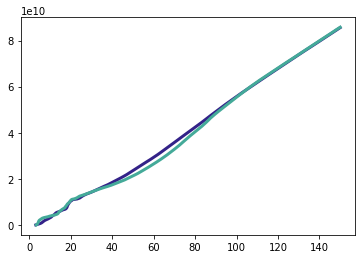

In [303]:
plt.plot(ATP_final[:,0], ATP_final[:,1], color = ATP_color, linewidth = 3, label = 'ATP')
plt.plot(dATP_final[:,0], dATP_final[:,1], color = dATP_color, linewidth = 3, label = 'dATP')

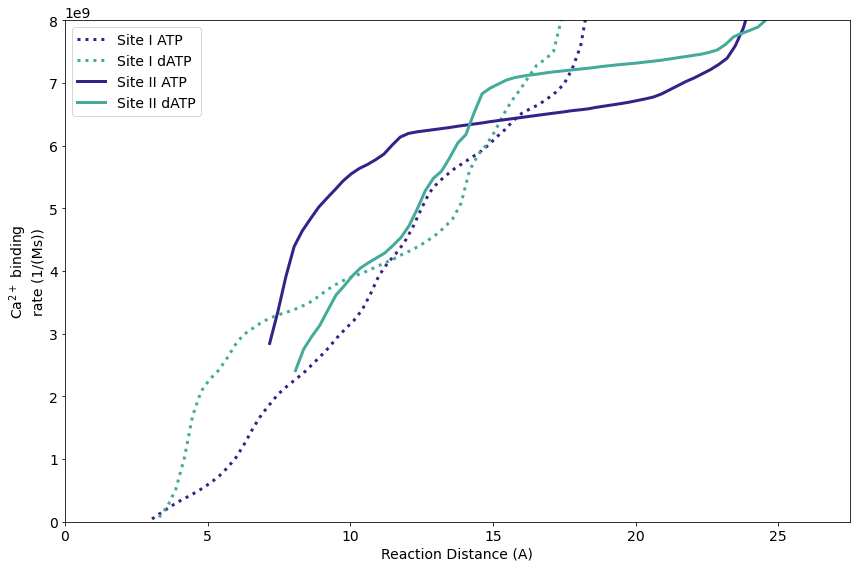

In [327]:
figure1 = plt.figure(figsize = (12,8))


plt.plot(ATP_final[:,0], ATP_final[:,1], ':',color = ATP_color, linewidth = 3, label = 'Site I ATP')
plt.plot(dATP_final[:,0], dATP_final[:,1], ':',color = dATP_color, linewidth = 3, label = 'Site I dATP')

plt.plot(ATP_site_II[:,0], ATP_site_II[:,1], color = ATP_color, linewidth = 3, label = 'Site II ATP')
plt.plot(dATP_site_II[:,0], dATP_site_II[:,1], color = dATP_color, linewidth = 3, label = 'Site II dATP')
plt.xlim(0,27.5)
plt.ylim(0,8e9)
plt.yticks(fontsize=14)
plt.legend(fontsize = 14)
plt.xticks(fontsize=14)
ax = plt.gca()
ax.yaxis.get_offset_text().set_fontsize(14)
plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('Ca$^{2+}$ binding\nrate (1/(Ms))', fontsize = 14)
plt.tight_layout()

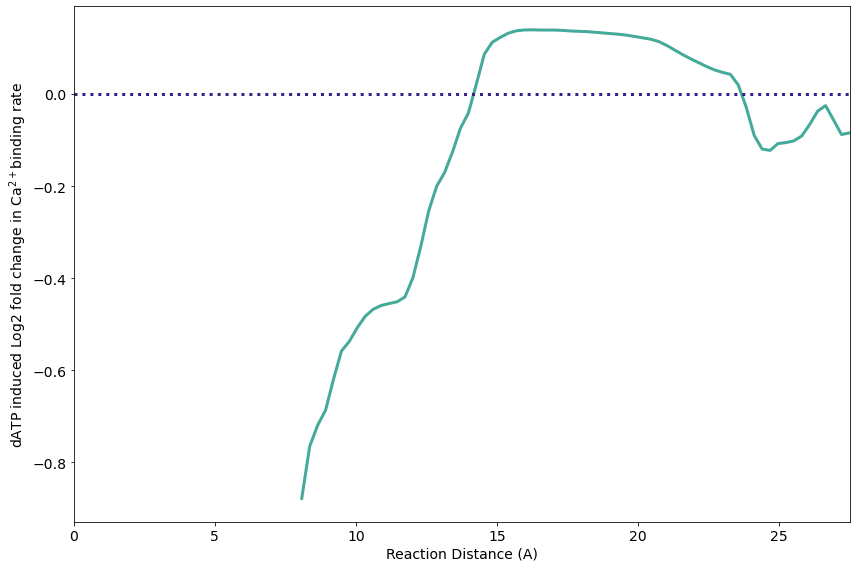

In [300]:
figure1 = plt.figure(figsize = (12,8))

start_interp = min(dATP_site_II[:,0])
x  = np.linspace(start_interp, 50, 150)
plt.plot(x, 
         np.log2(np.interp(x, dATP_site_II[:,0], dATP_site_II[:,1])/np.interp(x, ATP_site_II[:,0], ATP_site_II[:,1])),
        color = dATP_color, linewidth = 3)
lim = plt.xlim()
plt.plot((0,60),(0,0),':', color = ATP_color, linewidth = 3)

plt.xlim(0,27.5)

plt.yticks(fontsize=14)

plt.xticks(fontsize=14)

plt.xlabel('Reaction Distance (A)', fontsize = 14)
plt.ylabel('dATP induced Log2 fold change in Ca$^{2+}$binding rate', fontsize = 14)
plt.tight_layout()
#plt.savefig('Change_Ca_site_i.svg')